# Text pre-processing and exploration:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
data_path = "/content/drive/My Drive/IMDB Dataset.csv"

In [3]:
import os
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import pandas as pd
import numpy as np
import sklearn
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eden0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eden0\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
stop_words = (stopwords.words('english'))
dataset_path = r"C:\Users\eden0\Desktop\IMDB Dataset.csv"

positive_counter = 0
negative_counter = 0
positive_word_dic = {}
negative_word_dic = {}

def preprocessing_exploration(dataset):
    global positive_counter
    global negative_counter
    global positive_word_dic
    global negative_word_dic
    
    for ind in dataset.index:
        tokens = nltk.word_tokenize(dataset['review'][ind])
        isPositive = False
        if dataset['sentiment'][ind] == 'positive':
            isPositive = True
            positive_counter += 1
        else:
            negative_counter += 1

        review_after_preprocess = ""
        for word in tokens:
            word = word.lower()
            if word not in stop_words and word.isalpha() and len(word) > 1 and word != "br":
                word = PorterStemmer().stem(word)
                review_after_preprocess += word + " "
                if isPositive:
                    if word not in positive_word_dic:
                        positive_word_dic[word] = 1
                    else:
                        word_counter = positive_word_dic[word]
                        word_counter += 1
                        positive_word_dic[word] = word_counter
                else:
                    if word not in negative_word_dic:
                        negative_word_dic[word] = 1
                    else:
                        word_counter = negative_word_dic[word]
                        word_counter += 1
                        negative_word_dic[word] = word_counter
        dataset['review'][ind] = review_after_preprocess
    return dataset


dataset_after_preprocessing = preprocessing_exploration(pd.read_csv(data_path))

In [5]:
pos_bigram_dictionary = {}
neg_bigram_dictionary = {}

# create bigram dictionary
for ind in dataset_after_preprocessing.index:
    nltk_tokens = nltk.word_tokenize(dataset_after_preprocessing['review'][ind])
    for token in list(nltk.bigrams(nltk_tokens)):
        if dataset_after_preprocessing['sentiment'][ind] == 'positive':
            if token not in pos_bigram_dictionary:
                pos_bigram_dictionary[token] = 1
            else:
                word_counter = pos_bigram_dictionary[token]
                word_counter += 1
                pos_bigram_dictionary[token] = word_counter
        else:
            if token not in neg_bigram_dictionary:
                neg_bigram_dictionary[token] = 1
            else:
                word_counter = neg_bigram_dictionary[token]
                word_counter += 1
                neg_bigram_dictionary[token] = word_counter

## Split to train and test (50%, 50%) 

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset_after_preprocessing['review'], dataset_after_preprocessing['sentiment'], test_size = 0.5, random_state = 42)  

## Number of docs from each category

In [7]:
print(f"The number of docs for the positive category: {positive_counter}")
print(f"The number of docs for the negative category: {negative_counter}")

The number of docs for the positive category: 25000
The number of docs for the negative category: 25000


## Top 10 terms per category


### unigram

In [8]:
from operator import itemgetter 

N=10
pos_res = dict(sorted(positive_word_dic.items(), key = itemgetter(1), reverse = True)[:N]) 
df = pd.DataFrame(pos_res.items())
df.columns =['Term', 'Frequency'] 
print("The top 10 unigram terms - positive category:") 
print()
print(df)


# format = "{:<10}{:<10}"    
# print (format.format("Word","Frequency"))
# for word,freq in pos_res.items():
#     print (format.format(word,freq))
    
print()

neg_res = dict(sorted(negative_word_dic.items(), key = itemgetter(1), reverse = True)[:N]) 
df = pd.DataFrame(neg_res.items())
df.columns =['Term', 'Frequency'] 
print("The top 10 unigram terms - negative category:") 
print()
print(df)


The top 10 unigram terms - positive category:

      Term  Frequency
0     film      49326
1     movi      43454
2      one      27464
3     like      20053
4     time      15588
5      see      14795
6     good      14700
7    stori      13738
8  charact      13714
9     make      13195

The top 10 unigram terms - negative category:

    Term  Frequency
0   movi      56280
1   film      43342
2    one      26116
3   like      24112
4   make      15438
5   even      15372
6  would      15222
7    get      15171
8  watch      14744
9   time      14474


### bigram 

In [9]:
N=10
pos_bigram_res = dict(sorted(pos_bigram_dictionary.items(), key = itemgetter(1), reverse = True)[:N]) 
df = pd.DataFrame(pos_bigram_res.items())
df.columns =['Term', 'Frequency'] 
print("The top 10 bigram terms - positive category:") 
print()
print(df)

print()

N=10
neg_bigram_res = dict(sorted(neg_bigram_dictionary.items(), key = itemgetter(1), reverse = True)[:N]) 
df = pd.DataFrame(neg_bigram_res.items())
df.columns =['Term', 'Frequency'] 
print("The top 10 bigram terms - negative category:") 
print()
print(df)

The top 10 bigram terms - positive category:

                  Term  Frequency
0          (one, best)       1662
1        (watch, movi)       1285
2       (even, though)       1092
3          (see, movi)        950
4         (ever, seen)        942
5         (look, like)        927
6        (first, time)        911
7  (highli, recommend)        865
8          (new, york)        835
9      (main, charact)        829

The top 10 bigram terms - negative category:

                Term  Frequency
0       (look, like)       2761
1      (watch, movi)       1775
2       (ever, seen)       1644
3       (wast, time)       1618
4  (special, effect)       1446
5       (movi, ever)       1322
6        (bad, movi)       1199
7      (worst, movi)       1123
8       (movi, like)       1101
9       (make, movi)       1068


## Terms (uni-grams, bi-grams) distribution per category

### uni-gram

<function matplotlib.pyplot.show(*args, **kw)>

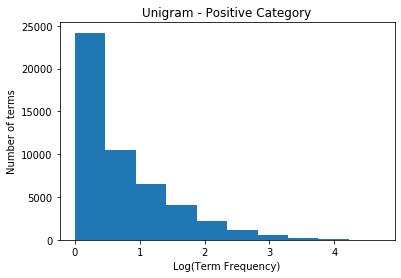

In [10]:
from operator import itemgetter 
import matplotlib.pyplot as plt
import numpy as np

for key in positive_word_dic:
    value = positive_word_dic[key]
    positive_word_dic[key] = np.log10(value)

plt.hist(positive_word_dic.values())
plt.title("Unigram - Positive Category")
plt.xlabel("Log(Term Frequency)")
plt.ylabel("Number of terms")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

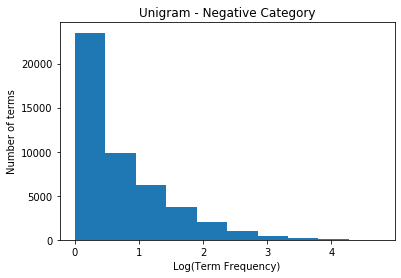

In [11]:
for key in negative_word_dic:
    value = negative_word_dic[key]
    negative_word_dic[key] = np.log10(value)

plt.hist(negative_word_dic.values())
plt.title("Unigram - Negative Category")
plt.xlabel("Log(Term Frequency)")
plt.ylabel("Number of terms")
plt.show

### bi-gram

<function matplotlib.pyplot.show(*args, **kw)>

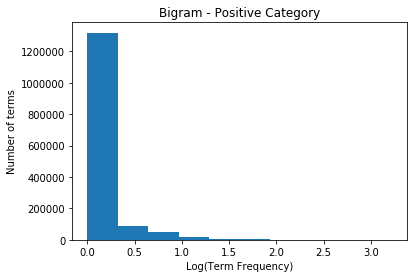

In [12]:
for key in pos_bigram_dictionary:
    value = pos_bigram_dictionary[key]
    pos_bigram_dictionary[key] = np.log10(value)

plt.hist(pos_bigram_dictionary.values())

plt.title("Bigram - Positive Category")
plt.xlabel("Log(Term Frequency)")
plt.ylabel("Number of terms")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

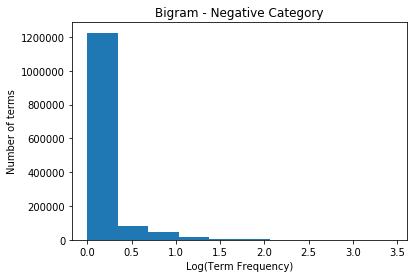

In [13]:
for key in neg_bigram_dictionary:
    value = neg_bigram_dictionary[key]
    neg_bigram_dictionary[key] = np.log10(value)
    
plt.hist(neg_bigram_dictionary.values())

plt.title("Bigram - Negative Category")
plt.xlabel("Log(Term Frequency)")
plt.ylabel("Number of terms")
plt.show

# Document classification – un-supervised learning:

In [14]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('sentiwordnet')
nltk.download('wordnet')
from nltk.corpus import sentiwordnet as swn

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\eden0\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\eden0\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eden0\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
taggedlist=[]
# Create POS tagging for each token
for ind in x_test.index:
    taggedlist.append(nltk.pos_tag(x_test[ind].split()))
wnl = nltk.WordNetLemmatizer()

In [16]:
score_list=[]
to_print = True
# iterate over all tokens for each review
for idx,taggedsent in enumerate(taggedlist):  
    score_list.append([])
    for idx2,t in enumerate(taggedsent):  
        newtag=''
        #t[0] word, t[1] pos tag
        lemmatized=wnl.lemmatize(t[0])
        if t[1].startswith('NN'):
            newtag='n'
        elif t[1].startswith('JJ'):
            newtag='a'
        elif t[1].startswith('V'):
            newtag='v'
        elif t[1].startswith('R'):
            newtag='r'
        else:
            newtag=''       
        if(newtag!=''):    
            synsets = list(swn.senti_synsets(lemmatized, newtag))
            # synsets contains for each token the probability for negative, positive and objective
            # Getting average of all possible sentiments        
            score=0
            if(len(synsets)>0):
                for syn in synsets:
                    score+=syn.pos_score()-syn.neg_score()
                score_list[idx].append(score/len(synsets))            

In [17]:
review_sentiment=[]

for score_sent in score_list:
    score = sum([word_score for word_score in score_sent])/len(score_sent)
    if score > 0:
        review_sentiment.append("positive")
    else:
        review_sentiment.append("negative")

from sklearn.metrics import accuracy_score

print("Accuracy Score for unsupervised learning: ",accuracy_score(y_test, review_sentiment))

Accuracy Score for unsupervised learning:  0.63064


# Document classification – supervised learning:

# feature extraction

In [18]:
#feature extraction:

from __future__ import print_function

import logging
import numpy as np
import sys
from time import time
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.utils.extmath import density
from sklearn import metrics
import pickle


#bigram:
# train , test = split_train_test(dataset_after_preprocessing)
# bigram_vectorizer = CountVectorizer(ngram_range=(1,2),token_pattern=r'\b\w+\b',min_df=1)
bigram_vectorizer= CountVectorizer(max_features=10000)
#Train:
# corpus_train=[]
# for entry in train["review"]:
#     corpus_train.append(entry)
# Y_train=[]
# for entry in train["sentiment"]:
#     Y_train.append(entry)
    
X_train_v = bigram_vectorizer.fit_transform(x_train)

print("y train:")
print(y_train)
print("x train:")
print(X_train_v)

#Test:

# corpus_test=[]
# for entry in test["review"]:
#     corpus_test.append(entry)
X_test_v = bigram_vectorizer.transform(x_test)


print("train feature matrix:")
print(X_train_v.toarray())
print("test feature matrix:")
print(X_test_v.toarray())
print("bigram feature names:")
# print(bigram_vectorizer.get_feature_names())


#tf_idf:
tf_idf_vectorizer = TfidfVectorizer(sublinear_tf=True,max_df=0.5,stop_words="english")

#train:
X_train_tfidf=tf_idf_vectorizer.fit_transform(x_train)

Y_train_tfidf=y_train

# print("y train tf idf:")
# print(Y_train_tfidf)
# print("x train tf idf :")
# print(X_train_tfidf)
#test :    
X_test_tfidf=tf_idf_vectorizer.transform(x_test)

Y_test_tfidf=y_test




# print("features in train:")
# X_train_tfidf
# print("features in test:")
# X_test_tfidf

# print(X_train_tfidf.toarray())
# print("n_samples: %d, n_features: %d" % X_train_tfidf.shape)

# print("X_test_tfidf")
# print(X_test_tfidf.toarray())
# print("n_samples: %d, n_features: %d" % X_test_tfidf.shape)




y train:
25858    negative
10784    negative
24807    positive
49534    negative
3345     negative
           ...   
11284    positive
44732    positive
38158    negative
860      positive
15795    positive
Name: sentiment, Length: 25000, dtype: object
x train:
  (0, 1808)	2
  (0, 672)	1
  (0, 6135)	1
  (0, 5646)	1
  (0, 8972)	1
  (0, 4979)	1
  (0, 9470)	1
  (0, 1442)	1
  (0, 8166)	1
  (0, 1427)	2
  (0, 6989)	1
  (0, 9754)	1
  (0, 8277)	1
  (0, 7690)	2
  (0, 3725)	1
  (0, 6690)	2
  (0, 3818)	1
  (0, 606)	1
  (0, 8049)	1
  (0, 5822)	1
  (0, 8801)	1
  (0, 1363)	1
  (0, 4753)	2
  (0, 617)	2
  (0, 7824)	1
  :	:
  (24999, 5280)	1
  (24999, 851)	1
  (24999, 8987)	1
  (24999, 4750)	1
  (24999, 4562)	1
  (24999, 2996)	1
  (24999, 5389)	1
  (24999, 1401)	1
  (24999, 1123)	1
  (24999, 4143)	1
  (24999, 9259)	1
  (24999, 7977)	1
  (24999, 2204)	1
  (24999, 4456)	1
  (24999, 3143)	1
  (24999, 7677)	1
  (24999, 8526)	1
  (24999, 3853)	1
  (24999, 6362)	1
  (24999, 9118)	1
  (24999, 8890)	1
  (24999

# Classify using machine learning methods

SVM  bag of words
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=1, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
train time:  0.9526247978210449
test time:   0.016953706741333008
accuracy:    85.8

SVM  tf_idf
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='

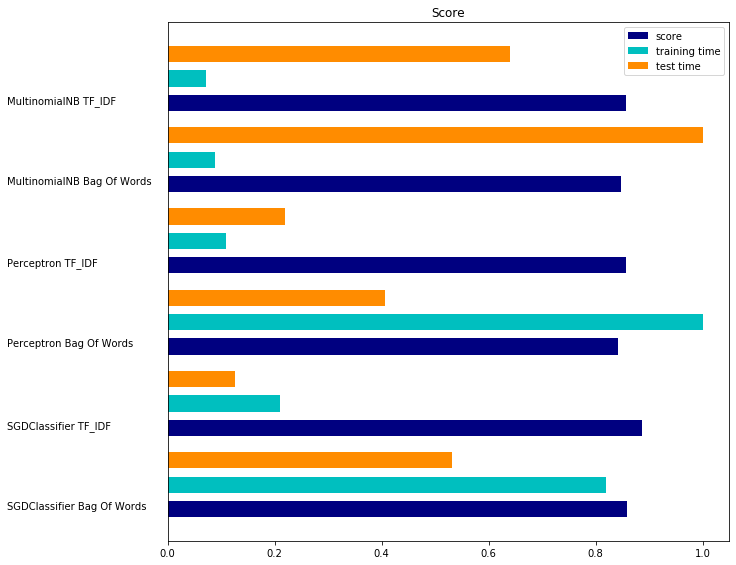

In [20]:
#prediction:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import MultinomialNB
import pickle


def trim(s):
    """Trim string to fit on terminal (assuming 80-column display)"""
    return s if len(s) <= 80 else s[:77] + "..."


# Benchmark classifiers, training model with train set 
# print the accurecy(of test set) , test time and train time 
# return the model name ,  score , test time and train time 
def benchmark(clf,Xtrain,Ytrain,Xtest,Ytest,nameOfFeatureExt):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(Xtrain, Ytrain)
    train_time = time() - t0
    print("train time: ",train_time)

    t0 = time()
    pred = clf.predict(Xtest)
    test_time = time() - t0
    print("test time:  ", test_time)

    score = metrics.accuracy_score(Ytest, pred)
    print("accuracy:   ",score*100)

    print()
    clf_descr = str(clf).split('(')[0]+nameOfFeatureExt
    return clf_descr, score, train_time, test_time


# the function run SVM Perceptron and Naive Bayes models 
# the function get x_train and x_test after features extraction of two methods 
def runModels(X_train_v,y_train,X_test_v,y_test, X_train_tfidf,Y_train_tfidf,X_test_tfidf,Y_test_tfidf):
    results = []
    for clf, name in (
            (SGDClassifier(random_state=1),"SVM"),
            (Perceptron(random_state=1), "Perceptron"),
            (MultinomialNB(),"Naive Bayes")):
        print('=' * 80)
        print(name," bag of words")
        results.append(benchmark(clf,X_train_v,y_train,X_test_v,y_test," Bag Of Words"))
        print(name," tf_idf")
        results.append(benchmark(clf,X_train_tfidf,Y_train_tfidf,X_test_tfidf,Y_test_tfidf," TF_IDF"))
    return results

results=runModels(X_train_v,y_train,X_test_v,y_test, X_train_tfidf,Y_train_tfidf,X_test_tfidf,Y_test_tfidf)
   
# make some plots

indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()

# Tune each model parameters, as well as pre-processing and parameters steps to optimize the results

In [22]:
#Optimize the NB Classifier:

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# the function try to optimize the model using pipeline, 
# the function check the parameters : vect__max_df,vect__ngram_range , clf__alpha
# return the best accurecy and params of the model and feature extraction method 
def OptimizeClassifier(model_name,fe_name, model,vectorizer):
#tf_idf
    filename = 'model' +'.' +model_name + '.' + fe_name + '.sav'
    try:
    #load the model from disk (if there is)
        gs_clf = pickle.load(open(filename, 'rb'))
    except:
        nb_clf = Pipeline([('vect', vectorizer),('clf',model )])
        parameters =  {'vect__max_df': (0.3,0.4, 0.5, 0.6, 0.7, 0.8), 'vect__ngram_range': ((1, 1), (1, 2)),
              'clf__alpha': (0.000001, 0.00001, 0.0001, 0.001, 0.01)}
        gs_clf = GridSearchCV(nb_clf, parameters, n_jobs=3)
        gs_clf = gs_clf.fit(x_train,y_train)
        pickle.dump(gs_clf, open(filename, 'wb'))
    print('Best score:   ',gs_clf.best_score_)
    print('Best params:   ',gs_clf.best_params_)
    prediction = gs_clf.predict(x_test)
    accurecy=metrics.accuracy_score(y_test,prediction)
    print("accuracy:  ",accurecy*100)
    return gs_clf.best_score_,gs_clf.best_params_,accurecy

    
    

results = []
for clf, name in (
        (SGDClassifier(random_state=1),"SVM"),
        (Perceptron(random_state=1), "Perceptron"),
        (MultinomialNB(),"Naive Bayes")):
    print('=' * 80)
    print(name," tf_idf")
    results.append(OptimizeClassifier(name,"tf_idf",clf,TfidfVectorizer()))
    print(name," bag of words")
    results.append(OptimizeClassifier(name,"bag of words",clf,CountVectorizer(max_features=10000)))






SVM  tf_idf
Best score:    0.8946799999999999
Best params:    {'clf__alpha': 1e-05, 'vect__max_df': 0.5, 'vect__ngram_range': (1, 2)}
accuracy:   89.936
SVM  bag of words
Best score:    0.87748
Best params:    {'clf__alpha': 0.01, 'vect__max_df': 0.3, 'vect__ngram_range': (1, 2)}
accuracy:   88.008
Perceptron  tf_idf
Best score:    0.88024
Best params:    {'clf__alpha': 1e-06, 'vect__max_df': 0.6, 'vect__ngram_range': (1, 2)}
accuracy:   88.5
Perceptron  bag of words
Best score:    0.8476800000000001
Best params:    {'clf__alpha': 1e-06, 'vect__max_df': 0.6, 'vect__ngram_range': (1, 2)}
accuracy:   84.804
Naive Bayes  tf_idf
Best score:    0.8623200000000001
Best params:    {'clf__alpha': 0.01, 'vect__max_df': 0.3, 'vect__ngram_range': (1, 2)}
accuracy:   86.936
Naive Bayes  bag of words
Best score:    0.8585200000000001
Best params:    {'clf__alpha': 0.01, 'vect__max_df': 0.3, 'vect__ngram_range': (1, 2)}
accuracy:   85.992
